In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangladeshis-flower/Kamini/img_aug_370_hflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_45_zoom.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_407_vflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_367_vflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_3_vflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_origonly_535_orig.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_245_hflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_319_zoom.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_310_zoom.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_80_hflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_372_orig.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_294_orig.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_315_zoom.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_94_hflip.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_428_orig.jpg
/kaggle/input/bangladeshis-flower/Kamini/img_aug_170_hflip.jpg


In [2]:
import warnings

warnings.filterwarnings('ignore')
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [3]:
if torch.cuda.is_available():
    device = "cuda" 
else:
    device = "cpu" 
    
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root='/kaggle/input/bangladeshis-flower', transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size  

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

print("Training set size:", len(train_dataset))
print("Testing set size:", len(test_dataset))

Training set size: 18000
Testing set size: 2000


In [4]:
print("Classes:", dataset.classes)

Classes: ['Belly', 'Gondhoraj', 'Kamini', 'Kathgulap', 'Kolaboti', 'Madhobilota', 'Noyontara', 'Rainlily', 'Sondhamaloti', 'Zinnia']


In [5]:
import matplotlib.pyplot as plt

def show_batch(dataloader, title="Batch of Images"):
    images, labels = next(iter(dataloader))
    fig, axes = plt.subplots(4, 8, figsize=(15, 8))
    fig.suptitle(title)
    
    for i, ax in enumerate(axes.flatten()):
        if i < len(images):
            img = images[i].permute(1, 2, 0)  # Convert tensor image for plotting
            ax.imshow(img)
            ax.set_title(dataset.classes[labels[i]])
            ax.axis('off')
    plt.show()

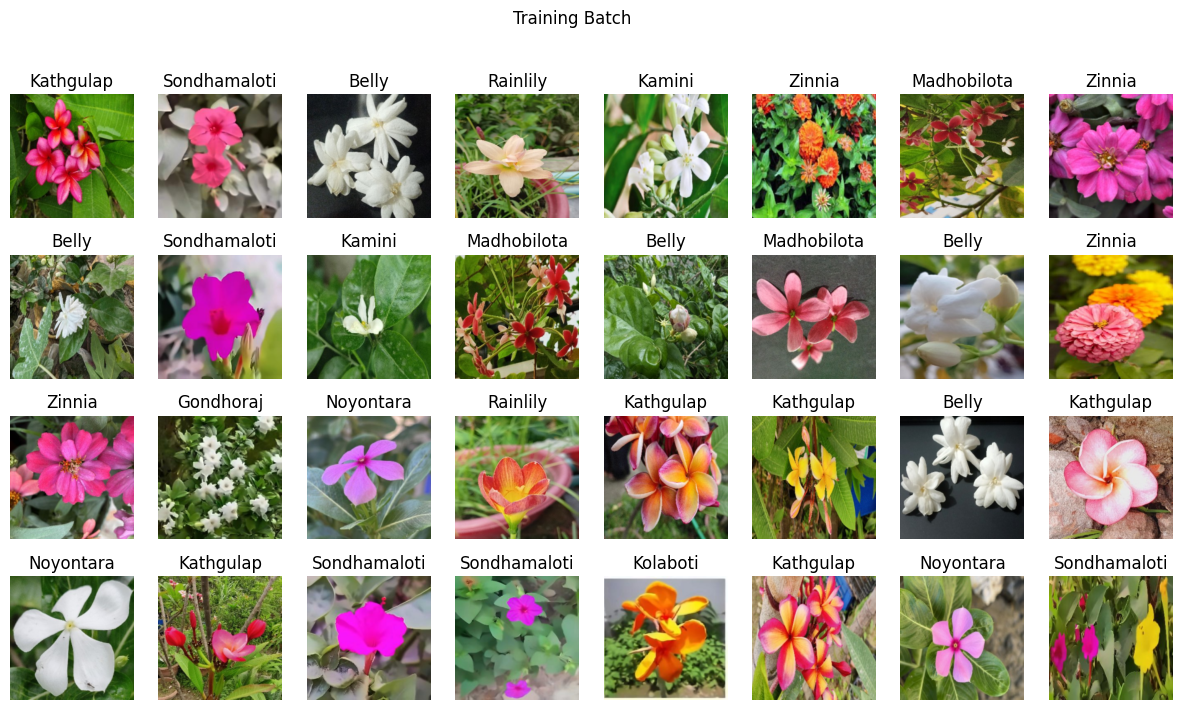

In [6]:
show_batch(train_loader, title="Training Batch")

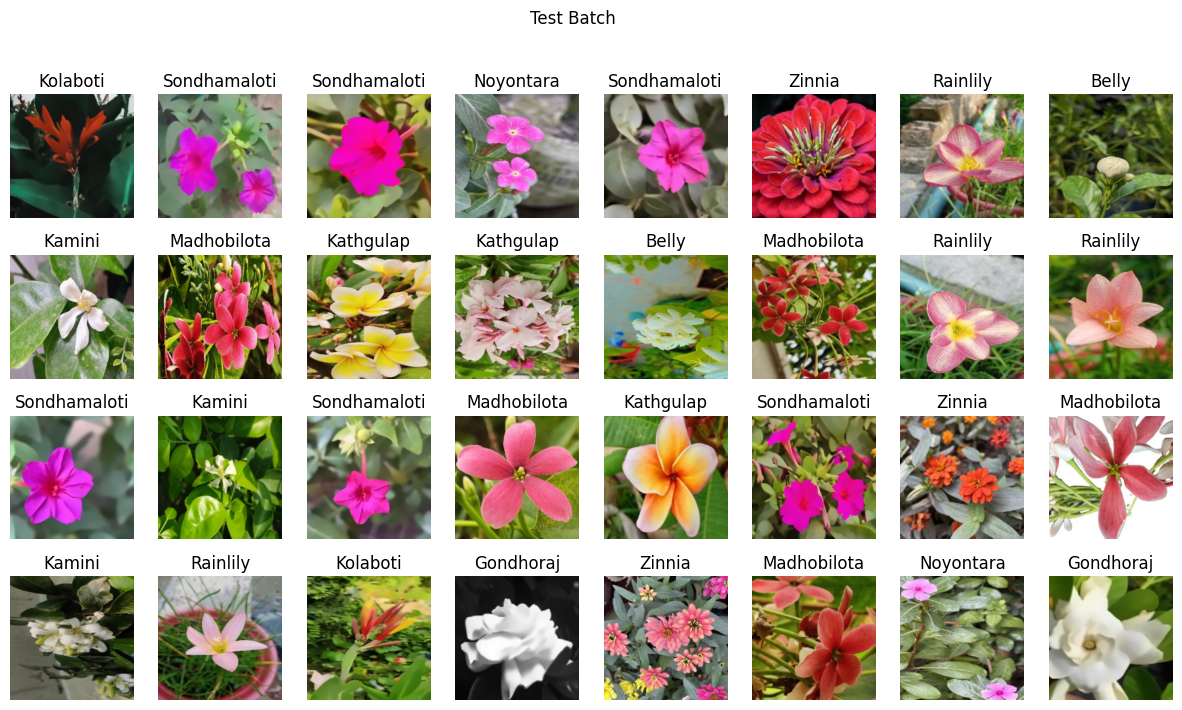

In [7]:
show_batch(test_loader, title="Test Batch")

In [8]:
from torch import nn, optim
from torchvision.models import resnet50, ResNet50_Weights

model=resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model=model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 203MB/s] 


In [9]:
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
for _, labels in train_loader:
    print(labels.max())
    break


tensor(9)


In [11]:
all_labels = []
for _, labels in train_loader:
    all_labels.extend(labels.tolist())
print(set(all_labels))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [13]:
from tqdm import tqdm

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    model.eval()
    correct = 0
    total = 0
    
    with torch.inference_mode():
        for images, labels in tqdm(test_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f},Accuracy of the model on the validation set: {100 * correct / total:.2f}")

100%|██████████| 63/63 [00:22<00:00,  2.84it/s]


Epoch [1/10], Loss: 0.1299,Accuracy of the model on the validation set: 98.40


100%|██████████| 63/63 [00:12<00:00,  5.14it/s]


Epoch [2/10], Loss: 0.0502,Accuracy of the model on the validation set: 96.45


100%|██████████| 63/63 [00:12<00:00,  5.23it/s]


Epoch [3/10], Loss: 0.0466,Accuracy of the model on the validation set: 95.30


100%|██████████| 63/63 [00:11<00:00,  5.33it/s]


Epoch [4/10], Loss: 0.0390,Accuracy of the model on the validation set: 95.05


100%|██████████| 63/63 [00:12<00:00,  5.04it/s]


Epoch [5/10], Loss: 0.0337,Accuracy of the model on the validation set: 98.85


100%|██████████| 63/63 [00:11<00:00,  5.36it/s]


Epoch [6/10], Loss: 0.0291,Accuracy of the model on the validation set: 98.65


100%|██████████| 63/63 [00:12<00:00,  5.22it/s]


Epoch [7/10], Loss: 0.0360,Accuracy of the model on the validation set: 98.40


100%|██████████| 63/63 [00:12<00:00,  5.19it/s]


Epoch [8/10], Loss: 0.0249,Accuracy of the model on the validation set: 99.60


100%|██████████| 63/63 [00:11<00:00,  5.37it/s]


Epoch [9/10], Loss: 0.0157,Accuracy of the model on the validation set: 98.65


100%|██████████| 63/63 [00:11<00:00,  5.40it/s]

Epoch [10/10], Loss: 0.0302,Accuracy of the model on the validation set: 95.75


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


**Confusion Matrix**

<Figure size 1000x800 with 0 Axes>

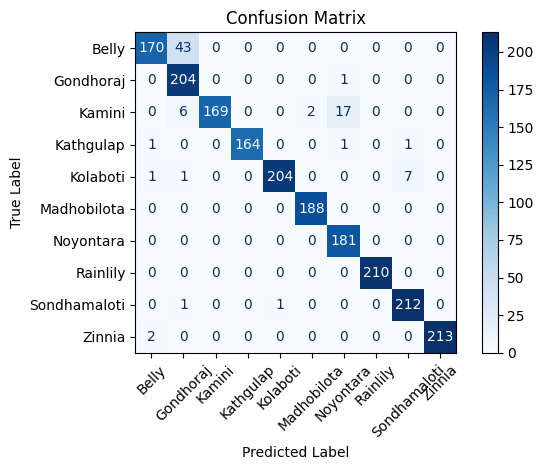

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

# Define class names
class_names = ['Belly', 'Gondhoraj', 'Kamini', 'Kathgulap', 'Kolaboti',  
               'Madhobilota', 'Noyontara', 'Rainlily', 'Sondhamaloti', 'Zinnia']

# Accumulate all predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.inference_mode():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import f1_score


**F1 Score**

In [18]:
from sklearn.metrics import f1_score

model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.inference_mode():
    for images, labels in tqdm(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
f1 = f1_score(all_labels, all_preds, average='macro')  # or 'macro'

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, "
      f"Accuracy: {accuracy:.2f}%, F1 Score: {f1:.4f}")


100%|██████████| 63/63 [00:11<00:00,  5.39it/s]

Epoch [10/10], Loss: 0.0302, Accuracy: 95.75%, F1 Score: 0.9581


In [19]:
torch.save(model.state_dict(), 'flower_classification.pth')